In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import roc
from sklearn.metrics import roc_curve, auc

In [132]:
subreddit_df = pd.read_csv('../../data/models/subreddit-pred/results/dt_preds.csv')
popularity_df = pd.read_csv('../../data/models/popularity-pred/results/dt_preds.csv')
politial_leaning_df = pd.read_csv('../../data/models/political_leaning_pred/results/preds.csv')
num_comments_df = pd.read_csv('../../data/models/num_comments/results/preds_df.csv')

In [133]:
color_map = {
    "Republican": "red",
    "democrats": "blue",
    "Liberal": "skyblue",
    "Conservative": "pink",
    "Libertarian": "gold",
    "politics": "green",
    
}

color_list = list(color_map.values())

In [139]:
model_names = ['Subreddit Prediction', 'Popularity Prediction', 'Political Leaning Prediction', 'Comment Count Prediction']
probs = [
    subreddit_df['probability'].apply(ast.literal_eval).to_list(),
    popularity_df['probability'].apply(ast.literal_eval).to_list(),
    politial_leaning_df['probs'].apply(ast.literal_eval).to_list(),
    num_comments_df['y_prob'].apply(ast.literal_eval).to_list()
]

y_true = [
    subreddit_df['label'].to_list(),
    popularity_df['score_label'].to_list(),
    politial_leaning_df['true_y'].to_list(),
    num_comments_df['y_test'].to_list()]

from sklearn.preprocessing import label_binarize

class_names = [
    ['politics','Conservative','Liberal','','Libertarian','Republican','democrats'],
    ['0', '1', '2-9', '10-99', '100-999', '1000+'],
    ['Conservative','Liberal','Libertarian'],
    ['Low Comments','Mid Comments', 'Many Comments']
]

y_true_bin = []
for i, y in enumerate(y_true):
    if i == 0:
        ranger = [0,1,2,3,4,5,6]
    else:
        ranger = range(0, len(class_names[i]))
    x = label_binarize(y, classes=ranger)
    y_true_bin.append(x)

In [140]:
for i in range(4):
    print(y_true_bin[i].shape)
    print(len(probs[i]))
    print(len(probs[i][0]))

(8230, 7)
8230
7
(21593, 6)
21593
6
(8948, 3)
8948
3
(20472, 3)
20472
3


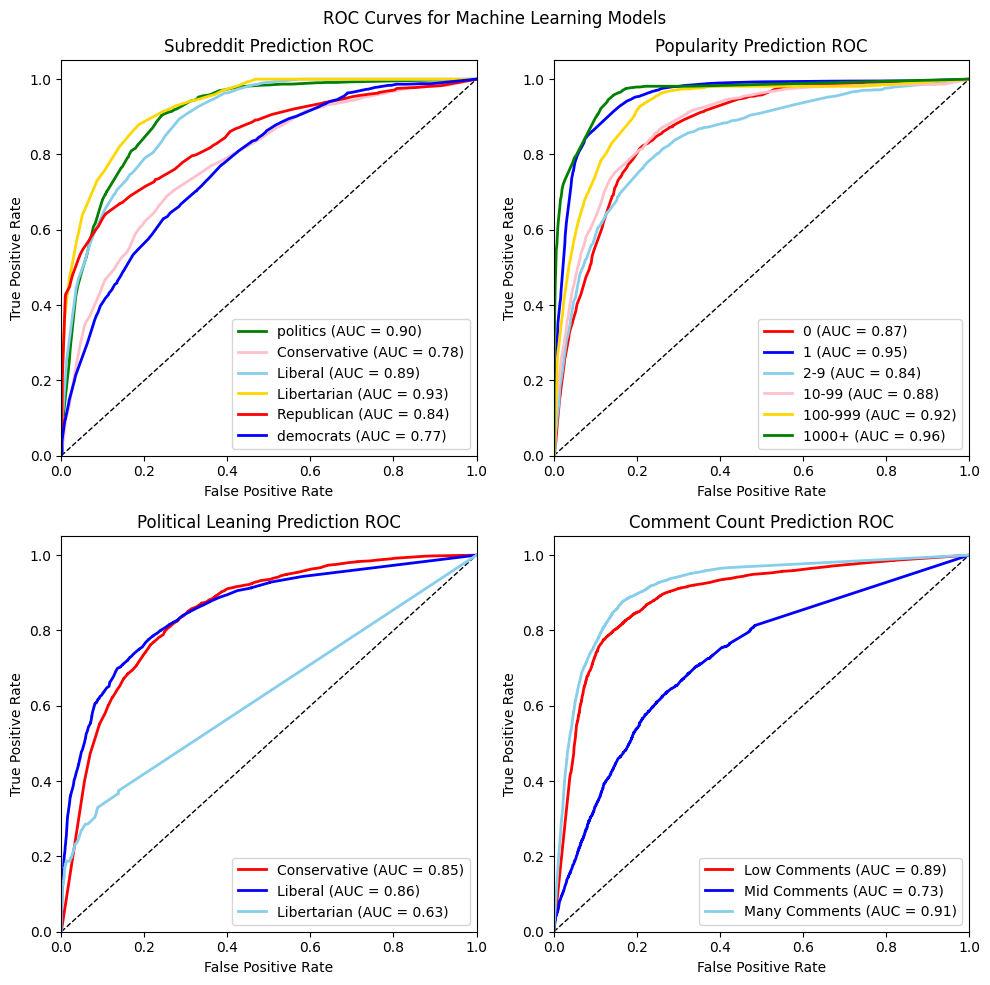

In [147]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, model in enumerate(model_names):
    ax[i // 2, i % 2].plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    ax[i // 2, i % 2].set_xlim([0.0, 1.0])
    ax[i // 2, i % 2].set_ylim([0.0, 1.05])

    fpr[model] = dict()
    tpr[model] = dict()
    roc_auc[model] = dict()

    for j, class_name in enumerate(class_names[i]):
        if i == 0 and j == 3:
            continue
        y_true_bin[i] = np.array(y_true_bin[i])
        probs[i] = np.array(probs[i])  

        fpr[model][class_name], tpr[model][class_name], _ = roc_curve(y_true_bin[i][:, j], probs[i][:, j])
        roc_auc[model][class_name] = auc(fpr[model][class_name], tpr[model][class_name])
        if i == 0:
            ax[i // 2, i % 2].plot(fpr[model][class_name], tpr[model][class_name], color=color_map[class_name], lw=2, label=f'{class_name} (AUC = {roc_auc[model][class_name]:0.2f})')
        else:
            ax[i // 2, i % 2].plot(fpr[model][class_name], tpr[model][class_name], color=color_list[j], lw=2, label=f'{class_name} (AUC = {roc_auc[model][class_name]:0.2f})')
    ax[i // 2, i % 2].set_xlabel('False Positive Rate')
    ax[i // 2, i % 2].set_ylabel('True Positive Rate')
    ax[i // 2, i % 2].set_title(f'{model} ROC')
    ax[i // 2, i % 2].legend(loc="lower right")

plt.suptitle('ROC Curves for Machine Learning Models')
plt.tight_layout()
plt.show()

fig.savefig('../../website-source/plots/all_roc_curves.png', dpi=300, bbox_inches='tight')